Correlation Analysis With Python

Three methods for correlation:
    - Pearson: Linear Relationship
    - Spearman: similar to pearson but based on rank rather than raw value


In [11]:
from mp_api.client import MPRester
import numpy as np
import pandas as pd
API_KEY = "4IeHY5jVcrgiKXNuAo6Jgs7yC0Z3hsli"
try:


    with MPRester(API_KEY) as mpr:
        # Query for Li-based cathode materials with high energy density
        docs = mpr.materials.conversion_electrodes.search(
        average_voltage = (2.5, 10.0), stability_charge=(0.0, 0.90), energy_grav=(350, 2000), capacity_grav=(100, 2000), max_delta_volume=(0.0, 0.050),
        fields=[
            "battery_id", "formula_discharge", "average_voltage"
            , "energy_grav", "energy_vol", "capacity_grav", "capacity_vol", "stability_charge", "fracA_charge", "max_delta_volume", "stability_discharge", "fracA_discharge"
        ])

        Fields = "average_voltage", "energy_grav", "energy_vol", "capacity_grav", "capacity_vol", "max_delta_volume", "stability_charge", "stability_discharge", "fracA_charge", "fracA_discharge"

        def average_field(docs, field):
            vals = [getattr(d, field) for d in docs if getattr(d, field) is not None]
            return sum(vals) / len(vals)


        df = pd.DataFrame([doc.dict() for doc in docs])
        df.head(20)

        for f in Fields:
            avg = average_field(docs, f)
            print(f"{f}: {avg}")
        print(len(df))
        df.head(20)


except Exception as e:
    print(f"An error occurred: {e}")


An error occurred: invalid fields requested: ['stability_charge', 'stability_discharge']. Available fields: ['builder_meta', 'battery_type', 'battery_id', 'thermo_type', 'battery_formula', 'working_ion', 'num_steps', 'max_voltage_step', 'last_updated', 'framework', 'framework_formula', 'elements', 'nelements', 'chemsys', 'formula_anonymous', 'warnings', 'formula_charge', 'formula_discharge', 'max_delta_volume', 'average_voltage', 'capacity_grav', 'capacity_vol', 'energy_grav', 'energy_vol', 'fracA_charge', 'fracA_discharge', 'reaction', 'initial_comp_formula', 'adj_pairs', 'electrode_object']


In [10]:
# Select only the numeric columns relevant to battery performance
cols_to_analyze = ['average_voltage', 'capacity_grav', 'energy_grav',
                    'max_delta_volume',
                   'fracA_charge', 'fracA_discharge', 'stability_charge', 'stability_discharge']

# Calculate the Pearson correlation
correlation_matrix = df[cols_to_analyze].corr(method="spearman")


"""max_delta_volume
average_voltage
capacity_grav
capacity_vol
energy_grav
energy_vol
fracA_charge
fracA_discharge
stability_charge
stability_discharge"""



correlation_matrix.head()

,average_voltage,capacity_grav,energy_grav,max_delta_volume,fracA_charge,fracA_discharge,stability_charge,stability_discharge
average_voltage,1.000000,-0.232624,0.469084,0.074923,-0.129770,-0.162115,0.137465,-0.310818
capacity_grav,-0.232624,1.000000,0.723224,0.110479,-0.026635,0.414194,0.044693,0.101896
energy_grav,0.469084,0.723224,1.000000,0.144227,-0.114146,0.262494,0.146422,-0.120708
max_delta_volume,0.074923,0.110479,0.144227,1.000000,-0.132652,-0.031215,0.018527,0.002498
fracA_charge,-0.129770,-0.026635,-0.114146,-0.132652,1.000000,0.738168,-0.072830,-0.155855


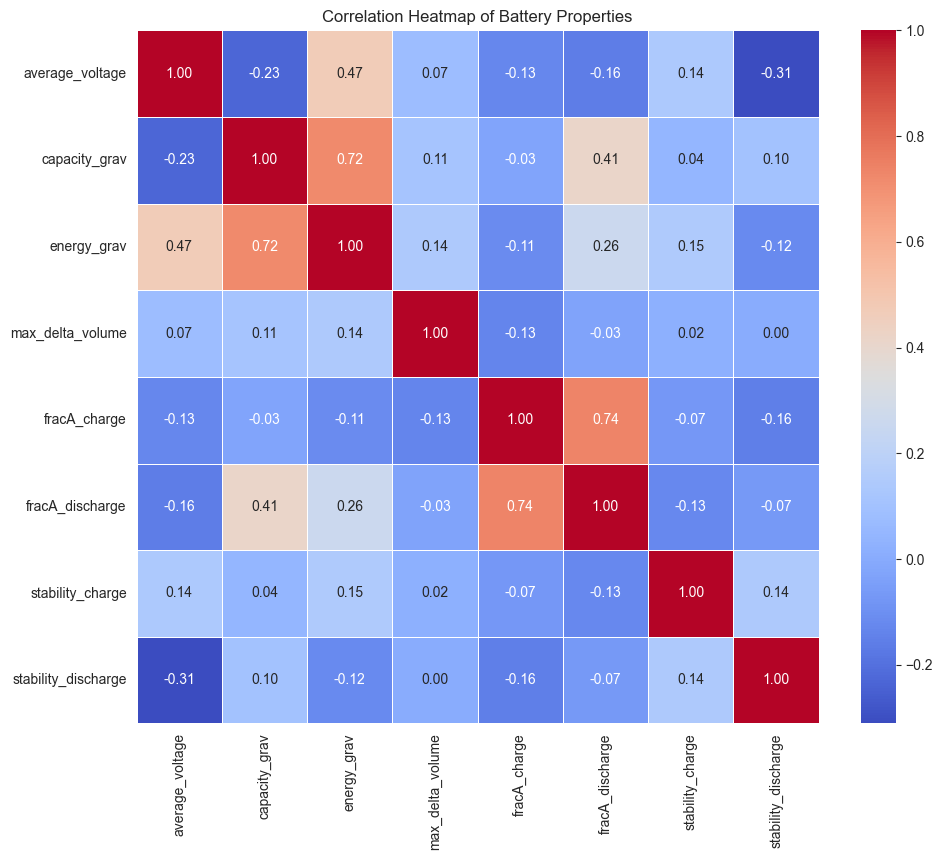


Data Size: 1109


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(11, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Battery Properties")
plt.show()
print(f"\nData Size: {len(df)}")

In [ ]:
"""
Positive Correlation
"""

1109


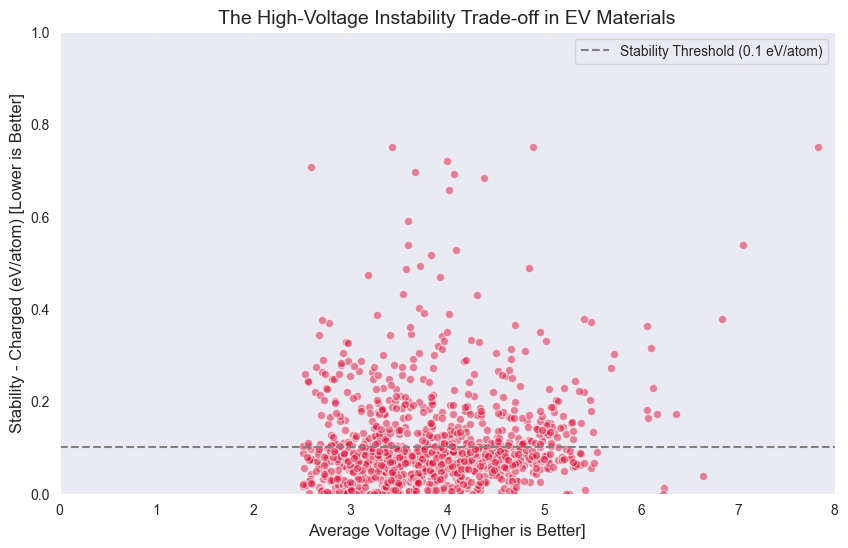

In [5]:
from mp_api.client import MPRester
import matplotlib.pyplot as plt

# Replace with your actual API Key from
voltages = [doc.average_voltage for doc in docs if doc.average_voltage is not None]
instabilities = [doc.stability_charge for doc in docs if doc.stability_charge is not None]

# 3. Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(voltages, instabilities, alpha=0.5, c='crimson', edgecolors='white')

# 4. Formatting to highlight the "Sweet Spot"
plt.title("The High-Voltage Instability Trade-off in EV Materials", fontsize=14)
plt.xlabel("Average Voltage (V) [Higher is Better]", fontsize=12)
plt.ylabel("Stability - Charged (eV/atom) [Lower is Better]", fontsize=12)
plt.axhline(y=0.1, color='gray', linestyle='--', label='Stability Threshold (0.1 eV/atom)')
plt.grid(True, alpha=0.1)
plt.xlim(0, 8.0)  # Focus on voltages from 2.5V to 5.0V
plt.ylim(0, 1.0)
plt.legend()
print(len(df))


plt.show()

Slope: 0.017419252700487626
Intercept: 0.040675533121299665
R²: 0.017156261230906966


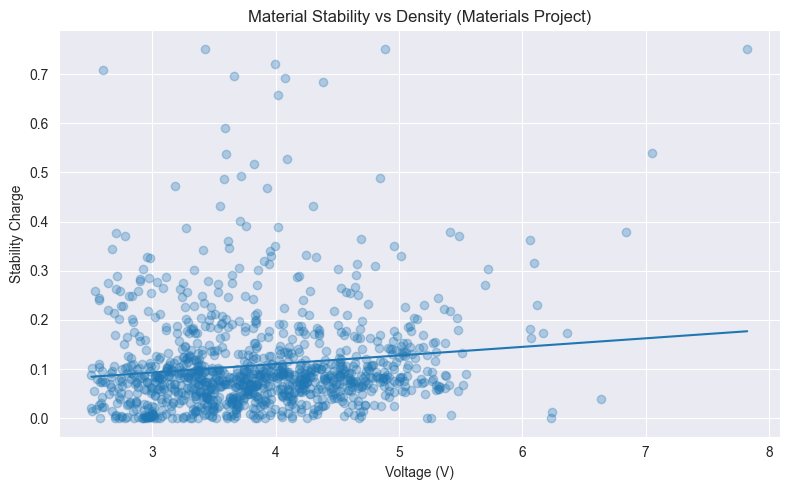

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
# -------------------------------
# 3. Define EV-relevant target
# (proxy: density vs stability)
# -------------------------------
X = df[['average_voltage']]
y = df[['stability_charge']]

# -------------------------------
# 4. Linear regression
# -------------------------------
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

r2 = r2_score(y, y_pred)
slope = model.coef_[0][0]
intercept = model.intercept_[0]

print("Slope:", slope)
print("Intercept:", intercept)
print("R²:", r2)

# -------------------------------
# 5. Plot regression
# -------------------------------
x_line = np.linspace(X.min().values[0], X.max().values[0], 100).reshape(-1, 1)
x_line_df = pd.DataFrame(x_line, columns=['average_voltage'])
y_line_df = pd.DataFrame(y_pred, columns=['stability_charge'])
y_line = model.predict(x_line_df)

plt.figure(figsize=(8, 5))
plt.scatter(X, y, alpha=0.5)
plt.plot(x_line, y_line)
plt.xlabel("Voltage (V)")
plt.ylabel("Stability Charge")
plt.title("Material Stability vs Density (Materials Project)")
plt.tight_layout()
plt.show()



Slope: -0.01705158252929781
Intercept: 0.11573246611517121
R²: 0.06318066860459803


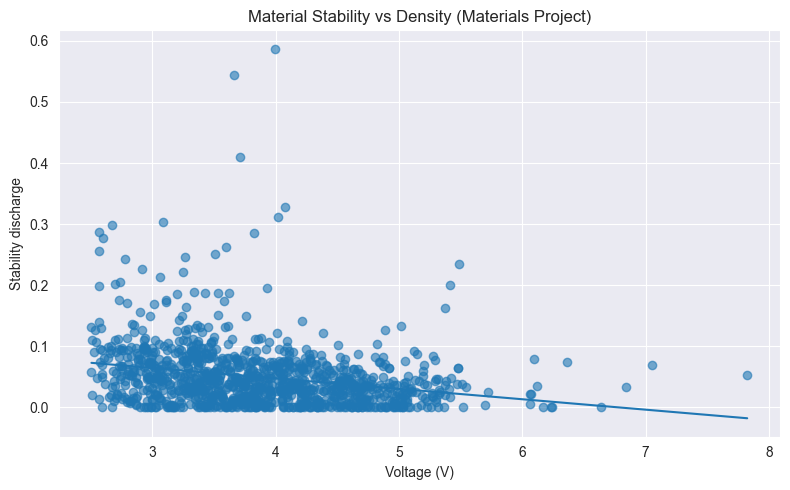

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
# -------------------------------
# 3. Define EV-relevant target
# (proxy: density vs stability)
# -------------------------------
X = df[['average_voltage']]
y = df[['stability_discharge']]

# -------------------------------
# 4. Linear regression
# -------------------------------
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

r2 = r2_score(y, y_pred)
slope = model.coef_[0][0]
intercept = model.intercept_[0]

print("Slope:", slope)
print("Intercept:", intercept)
print("R²:", r2)

# -------------------------------
# 5. Plot regression
# -------------------------------
x_line = np.linspace(X.min().values[0], X.max().values[0], 100).reshape(-1, 1)
x_line_df = pd.DataFrame(x_line, columns=['average_voltage'])
y_line_df = pd.DataFrame(y_pred, columns=['stability_discharge'])
y_line = model.predict(x_line_df)

plt.figure(figsize=(8, 5))
plt.scatter(X, y, alpha=0.6)
plt.plot(x_line, y_line)
plt.xlabel("Voltage (V)")
plt.ylabel("Stability discharge")
plt.title("Material Stability vs Density (Materials Project)")
plt.tight_layout()
plt.show()



In [ ]:
from mp_api.client import MPRester
import matplotlib.pyplot as plt

# Replace with your actual API Key from
voltages = [doc.average_voltage for doc in docs if doc.average_voltage is not None]
instabilities = [doc.stability_charge for doc in docs if doc.stability_charge is not None]

# 3. Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(voltages, instabilities, alpha=0.5, c='crimson', edgecolors='white')

# 4. Formatting to highlight the "Sweet Spot"
plt.title("The High-Voltage Instability Trade-off in EV Materials", fontsize=14)
plt.xlabel("Average Voltage (V) [Higher is Better]", fontsize=12)
plt.ylabel("Stability - Charged (eV/atom) [Lower is Better]", fontsize=12)
plt.axhline(y=0.1, color='gray', linestyle='--', label='Stability Threshold (0.1 eV/atom)')
plt.grid(True, alpha=0.1)
plt.xlim(0, 8.0)  # Focus on voltages from 2.5V to 5.0V
plt.ylim(0, 1.0)
plt.legend()
print(len(df))


plt.show()